<a href="https://colab.research.google.com/github/wendy1305/Passiflora_Mitochondrial_Genome/blob/main/Dia_2_Curso_ML_Hype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🦝🦝 Dia 2 — Curso de Introdução ao Aprendizado de Máquina 🦝🦝
Hype - Data & AI

O que veremos nessa aula:

- Machine Learning

- Problemas e Ferramentas

- Modelos lineares

- Modelos baseados em probabilidade e similaridade

- Regressões

- Recapitulação


### Captura dos dados

In [ ]:
from sklearn.datasets import load_wine, load_diabetes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, f1_score, r2_score
from sklearn.model_selection import cross_validate, train_test_split

In [ ]:
data = load_wine()
X = data['data'] # X é as entradas, conjunto de características que vão ser usadas para determinar o Y (saida)
y = data['target'] # Aqui é a saída, no caso do nosso dataset, vai determinar o tipo de vinho!

# Separação dos dados: separamos os dados entre treino e teste, onde 0.3 (30%) dos dados serão dados de teste e o restante de treino.
# O parâmetro 'random_state' garante que a divisão seja sempre a mesma.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


## 💻 Machine Learning

Na última aula, falamos um pouco sobre o que é Machine Learning, explicando que é a área dentro de Inteligência Artificial capaz de identificar padrões e realizar previsões.

Na aula de hoje, vamos entender mais a fundo os mais diversos tipos de algoritmos e ver como eles funcionam por de baixo dos panos!

## Algoritmos de Aprendizado Supervisionado 👁

### KNN - k-Nearest Neighbors 🎯

#### O que é o KNN? 🤔


O KNN é um algoritmo de aprendizado supervisionado que utiliza o calculo de distâncias para determinar valores ou classes. Pode ser utilizado tanto como um regressor quanto como um classificador. Vamos ver como esse algoritmo funciona?

💡 Imagine que você trabalha numa escola e tem um aluno novo que acabou de chegar. Você não sabe se ele gosta mais de esportes ou de arte, mas quer tentar adivinhar com base nos colegas dele.

Então você faz o seguinte:

- Você olha para os alunos mais parecidos com ele — por exemplo, os que têm idade parecida, moram perto, ou têm hobbies parecidos.

- Você pergunta a esses colegas o que eles gostam: arte ou esportes?

- Se a maioria desses colegas disser que gosta de esportes, você supõe que o novo aluno também vai gostar de esportes. Se a maioria disser arte, você assume que ele gosta de arte.

- A lógica do KNN é essa. Pegamos as informações gerais de uma váriavel (entradas) e tentamos descobrir a saída (por exemplo: se gosta de artes ou de esportes.)

- O KNN verifica, baseado nos calculos de distância, qual saída se encaixa em determinado perfil!

- Valor de K:  Se tivermos um k = 7, o valor de k seria o número de "vizinhos" que estamos escolhendo para fazer a previsão, isso é, vou olhar os 7 dados que tem as características mais parecidas e a minha saída escolhida vai ser a saída da maioria!

- Vizinhos: são os dados que estamos usando para calcular a distância com nosso dado atual. Os mais próximos são os que tem a menor distância.
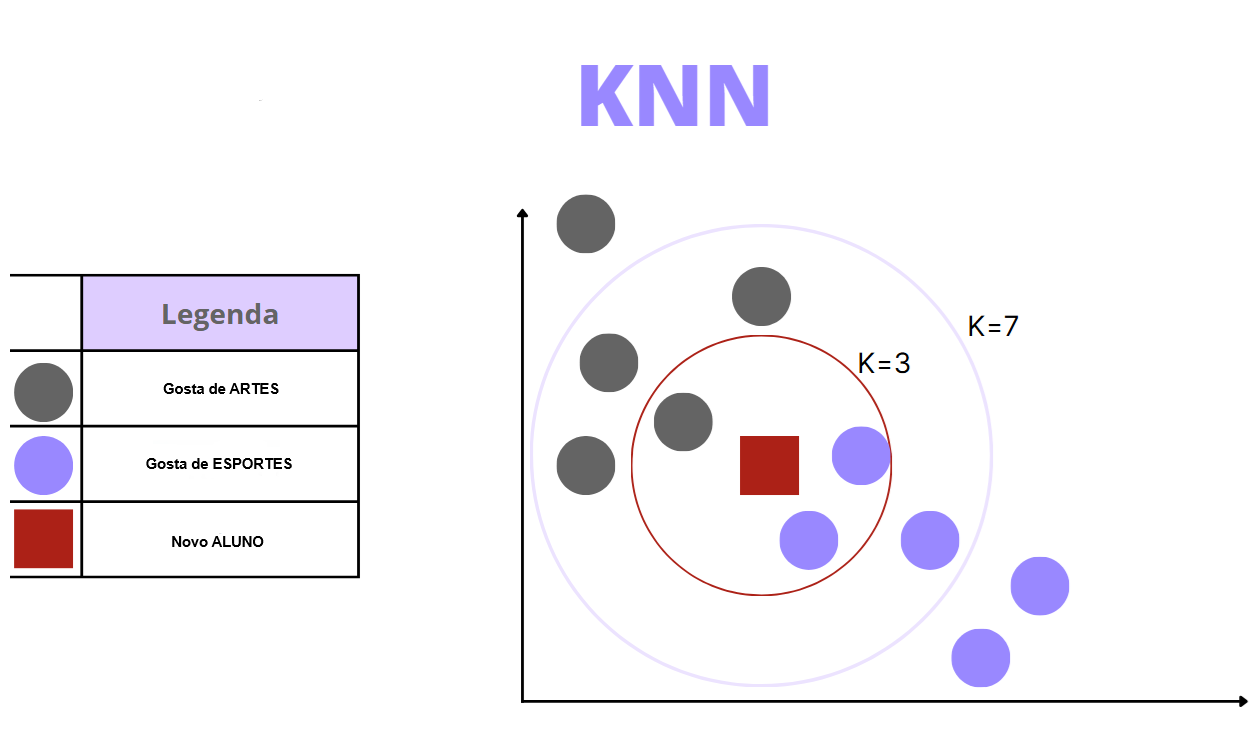



##### 🟥 Como determinar o melhor valor para K?

- Podemos observar que o novo aluno, baseado em suas características, ficou posicionado ali ao centro. Se determinamos K = 3, nosso novo aluno estaria mais próximo de 2 alunos que gostam de esportes e 1 aluno que gosta de artes, sendo classificado como aluno que gosta de esportes.

- Se trocarmos o K = 7, nosso novo aluno seria classificado como aluno que Artes, e não de esportes.

- Então, qual o melhor valor? Qual representa melhor o que o aluno realmente gosta?

- Não dá para definir um melhor valor para K, mas podemos definir intervalos ótimos para a maioria dos problemas.

- K pequeno (ex: 1, 3) deixa o modelo muito sensível, qualquer ruído que os dados tiverem pode fazer com que o algoritmo classifique errado, como no caso da imagem.

- K grande (ex: 50 - 100) deixa o modelo muito generalista, ignorando detalhes importantes.

Em geral, para escolher o melhor valor de K, escolha um número ímpar (evita empates) e teste os resultados, comparando com outros valores de K até achar um ponto ótimo.

#### Mão na massa! 🍕

A Validação Cruzada (Cross-Validation) é uma técnica usada para avaliar o desempenho de um modelo de forma mais robusta. Em vez de fazer uma única divisão dos dados (treino e teste), ela divide os dados em várias partes (chamadas folds), treina e testa o modelo múltiplas vezes em diferentes combinações desses folds e, ao final, calcula a média dos resultados. Isso evita que a performance do modelo seja superestimada ou subestimada por sorte, devido a uma divisão de dados favorável ou desfavorável.

Neste exemplo, ela está sendo usada para encontrar o melhor valor de 'K' para o algoritmo KNN. O código testa cada valor de K (3, 5, 7, etc.) com a validação cruzada para descobrir qual deles apresenta o melhor desempenho médio. Aquele K com a maior pontuação média na validação é considerado a escolha mais confiável, pois provou ser eficaz em múltiplas "rodadas" de teste diferentes, e não apenas em uma.

In [ ]:
# Validação cruzada com os dados de treino
k_list = [3, 5, 7, 9, 13, 17] # pegamos alguns valores possíveis para k, e vamos fazer um grid para determinarmos os melhores valores.

for k in k_list: # percorre a lista em todos os valores de K, fazendo o cross validation para cada um deles.
  knn_results = cross_validate(KNeighborsClassifier(n_neighbors=k),
                              X_train,
                              y_train,
                              cv=10,
                              scoring=['f1_macro'],
                              return_train_score=True)
  print("K:",
        k,
        "| Train F1:",
        knn_results['train_f1_macro'].mean(),
        "| Validation F1:",
        knn_results['test_f1_macro'].mean()
  )

  # Test
  clf = KNeighborsClassifier(n_neighbors=k) # melhor k do cross validation aqui
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print("Test:", f1_score(y_test, y_pred, average='macro'))
  print()

K: 3 | Train F1: 0.8279918786411427 | Validation F1: 0.6501226551226551
Test: 0.7260560990364894

K: 5 | Train F1: 0.7764584044308321 | Validation F1: 0.6317978317978317
Test: 0.7260560990364894

K: 7 | Train F1: 0.7748408406098384 | Validation F1: 0.6527946127946128
Test: 0.747008547008547

K: 9 | Train F1: 0.7390964509328753 | Validation F1: 0.6823665223665224
Test: 0.711574074074074

K: 13 | Train F1: 0.7127435068865918 | Validation F1: 0.6957094757094756
Test: 0.7431773236651286

K: 17 | Train F1: 0.7074461639074644 | Validation F1: 0.666079846079846
Test: 0.7464048873216954



#### Questões para *Fixação*

##### Questão 1: É verdade que os melhores valores para k em um problema de classificação usando KNN geralmente são os valores ***pares***? Justifique.

**Digite sua resposta:**

##### Questão 2: O que o parâmetro “K” representa no KNN?



a) Número de variáveis independentes

b) Número de classes

c) Número de vizinhos mais próximos considerados

d) Número de iterações no algoritmo

**Digite sua resposta:**

##### Questão 3: Explique o que pode acontecer se o valor de K for muito pequeno ou muito grande.

**Digite sua resposta:**

##### Questão 4: Imagine que você está lidando com um dataset com muitos atributos irrelevantes. O KNN tende a funcionar bem nesse caso? Por quê?

**Digite sua resposta:**

#### Gabarito



---


##### Questão 1:
É falso dizer que os melhores valores de K são os pares. Na verdade, valores ímpares são geralmente preferidos para evitar empates, principalmente em problemas com duas classes.



---


##### Questão 2:
Alternativa C


---


##### Questão 3:
K pequeno → risco de overfitting.

K grande → risco de underfitting.

O ideal é usar validação cruzada para testar diferentes valores de K e escolher o que maximiza o desempenho nos dados de validação.


---



##### Questão 4:

Não, o KNN não tende a funcionar bem quando há muitos atributos irrelevantes. Isso ocorre porque:

O KNN calcula a distância entre pontos com base em todas as variáveis.

Se muitas dessas variáveis não contribuem para a distinção entre as classes, elas podem adicionar "ruído" às distâncias, fazendo com que o algoritmo encontre vizinhos "enganosos".

Esse problema se intensifica em alta dimensionalidade (maldição da dimensionalidade), pois a diferença entre distâncias reais e irrelevantes se torna menos significativa.

### Naive Bayes

#### O que é Naive Bayes?

##### Definição
O Naive Bayes é um algoritmo baseado em probabilidade. Ele utiliza o Teorema de Bayes para calcular a probabilidade de uma amostra pertencer a uma determinada classe, assumindo que todas as variáveis de entrada são independentes entre si (por isso o nome "naive", que significa "ingênuo").

---

##### Entendendo o Teorema de Bayes

O **Naive Bayes** é baseado em uma fórmula matemática chamada **Teorema de Bayes**, que vem da **probabilidade condicional**.

##### O que o Teorema de Bayes diz?

O Teorema de Bayes calcula a **probabilidade de um evento A acontecer, dado que o evento B aconteceu**.

A fórmula é:

$$
P(A|B) = \frac{P(B|A) \times P(A)}{P(B)}
$$

Onde:

* **$P(A|B)$** → Probabilidade de A acontecer dado que B aconteceu (O que queremos descobrir)
* **$P(B|A)$** → Probabilidade de B acontecer dado que A aconteceu
* **$P(A)$** → Probabilidade de A acontecer (probabilidade inicial de A)
* **$P(B)$** → Probabilidade de B acontecer (fator de normalização)

---

##### Exemplo prático e simples (Fora de ML):

**Problema:**
Suponha que:

* 1% das pessoas de uma cidade têm uma doença rara.
* Existe um exame que dá **positivo para quem tem a doença 99% das vezes** (alta sensibilidade).
* Porém, o exame também dá **falsos positivos em 5% das pessoas que não têm a doença**.

**Pergunta:**
Se uma pessoa testa positivo, qual a chance dela realmente ter a doença?

---

##### Aplicando o Teorema de Bayes:

Definindo os eventos:

* **A = Pessoa tem a doença**
* **B = Teste deu positivo**

As probabilidades:

* $P(A) = 0,01$ (1%)
* $P(B|A) = 0,99$ (99%)
* $P(B|\text{não}A) = 0,05$ (5%)

Agora, precisamos calcular o **$P(B)$**:

$$
P(B) = P(B|A) \times P(A) + P(B|\text{não}A) \times P(\text{não}A)
$$

Substituindo:

$$
P(B) = 0,99 \times 0,01 + 0,05 \times 0,99
$$

$$
P(B) = 0,0099 + 0,0495 = 0,0594
$$

Agora calculamos o que queremos:

$$
P(A|B) = \frac{0,99 \times 0,01}{0,0594} = \frac{0,0099}{0,0594} \approx 0,1666
$$

---

##### Interpretação:

Mesmo com o teste positivo, a pessoa só tem **\~16,6% de chance** de realmente ter a doença. Isso acontece porque a doença é muito rara!

Esse tipo de problema é clássico para mostrar que **não basta um teste ser "bom"**, é preciso considerar a **probabilidade base (P(A))**, que no ML a gente chama de **distribuição das classes**.

---

##### Ligando isso ao Naive Bayes:

No **Naive Bayes**, usamos o Teorema de Bayes para calcular a **probabilidade de cada classe** (ex: "tipo de vinho") **dado os atributos de entrada (ex: acidez, teor alcoólico, etc)**.

Exemplo (simplificado):

Para prever a classe de um vinho com certas características $x$:

$$
P(\text{classe}|\text{características}) \propto P(\text{características}|\text{classe}) \times P(\text{classe})
$$

O modelo calcula isso para **cada classe possível**, e escolhe a que tiver a **maior probabilidade final**.



#### Mão na massa! 🍕

Neste exemplo vamos usar o Gaussian Naive Bayes, pois é a variante do algoritmo desenvolvida especificamente para lidar com dados contínuos, como as medições de teor alcoólico e acidez encontradas no dataset de vinhos. O método assume que esses dados seguem uma distribuição normal (Gaussiana) para calcular as probabilidades de classificação.

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Instanciando o classificador Naive Bayes (Usando o GaussianNB que assume distribuição Gaussiana)
nb_model = GaussianNB()

# Treinando o modelo
nb_model.fit(X_train, y_train)

# Fazendo as previsões nos dados de teste
y_pred_nb = nb_model.predict(X_test)

# Avaliando o desempenho do modelo
print("\n===== Avaliação do Modelo - Naive Bayes =====")
print(classification_report(y_test, y_pred_nb))



===== Avaliação do Modelo - Naive Bayes =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



#### Questões para *Fixação*


##### 1) O que significa o termo "Naive" no algoritmo Naive Bayes?

a) Que o algoritmo ignora os valores de entrada  
b) Que o algoritmo assume que todas as variáveis de entrada são independentes entre si  
c) Que o algoritmo só funciona com dados categóricos  
d) Que o algoritmo não utiliza o Teorema de Bayes  

---

##### 2) Em um problema de classificação, o que o Teorema de Bayes nos ajuda a calcular?

a) A distância entre os pontos do conjunto de dados  
b) A probabilidade de uma classe, dado um conjunto de características observadas  
c) O valor médio de cada característica  
d) A correlação entre as variáveis  

---

##### 3)  Qual das situações abaixo é uma **limitação** do Naive Bayes?

a) Funciona mal com atributos independentes  
b) Não pode lidar com dados categóricos  
c) Supõe independência entre as variáveis de entrada, o que nem sempre é verdade na prática  
d) Só pode ser usado para regressão  

---

##### 4️) Em problemas com dados contínuos (como o dataset de vinhos que usamos), qual tipo de Naive Bayes normalmente utilizamos?

a) Multinomial Naive Bayes  
b) Gaussian Naive Bayes  
c) Bernoulli Naive Bayes  
d) Decision Tree Naive Bayes  


#### Gabarito


1) **b**  
2) **b**  
3) **c**  
4) **b**



### Regressão Linear

#### O que é Regressão Linear?


A Regressão Linear é um método estatístico utilizado para modelar a relação entre duas variáveis numéricas. Especificamente, ela tenta encontrar a reta que melhor se ajusta aos dados para prever valores futuros da variável dependente (Y) com base nos valores da variável independente (X).

Imagine que você quer prever o tamanho de um rato com base em seu peso. Ao coletar várias observações de tamanho e peso, podemos plotar esses dados em um gráfico de dispersão. Se houver uma tendência linear clara (ou seja, os pontos formam aproximadamente uma linha), é possível utilizar a regressão linear para descrever essa relação.

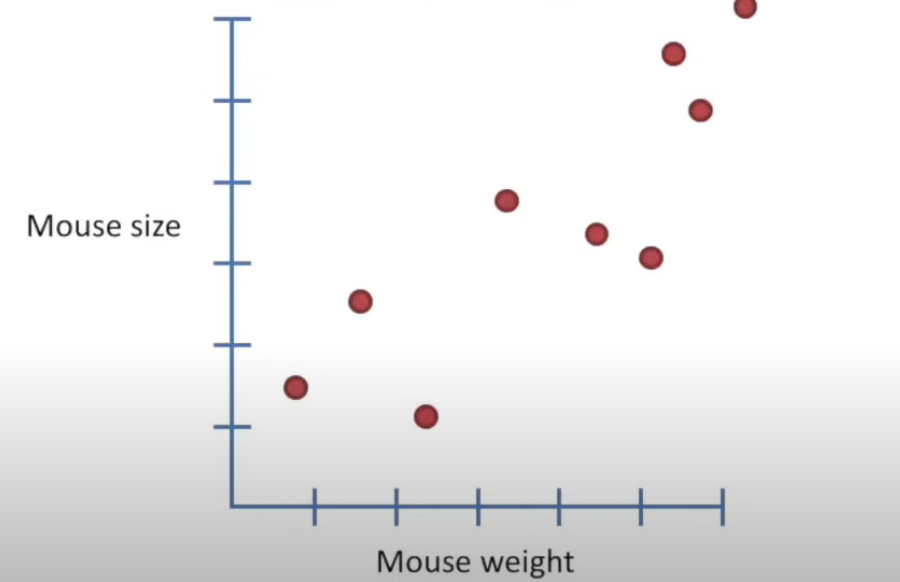

Na regressão linear simples, a relação entre as variáveis pode ser representada por uma equação de reta:

$y = aX + b$

onde:

$y= var.\space dependente$

$a = coeficiente\space angular$

$X = var.\space independente$

$b = coeficiente\space linear$

Nosso objetivo é encontrar os melhores valores para a e
b que minimizam o erro quadrático entre os valores previstos $\hat{y} \space$ e valores reais $y$

Para medirmos a qualidade da reta, medimos o erro entre o valor previsto e o valor real, chamado de erro.

$Erro = $ $y  $ - $\hat{y}$

Quanto menor esse erro, melhor a reta se ajusta.

O método mais comum para encontrar a melhor reta é o Método dos Mínimos Quadrados (Least Squares), que busca minimizar a soma dos quadrados dos erros:

***Soma dos erros quadráticos médios:*** $\space\sum_{i =1}^n{(y_{i} - \hat{y}_{i})^2}$

Quando dividido pelo número de observações
n, temos o Erro Quadrático Médio (MSE):

***MSE =***  $\space 1 \over n$ $\sum_{i =1}^n{(y_{i} - \hat{y}_{i})^2}$



Coeficiente de Determinação $R^2$:

O $R^2$ $(ou\space R-quadrado)$ é uma medida que mostra quão bem a linha de regressão se ajusta aos dados. Ele varia de 0 a 1:

Quanto mais próximo de 1, melhor o modelo explica os dados.

Quanto mais próximo de 0, pior o modelo explica os dados.

O $R^2$ indica a porcentagem da variação da variável
Y (variável resposta) que é explicada pela variável
X (variável explicativa) no modelo linear.

Traçada nossa reta de regressão, vamos entender o que tudo isso significa, aqui temos outro gráfico para visualizar o problema de prever o tamanho de um rato com base em seu peso.

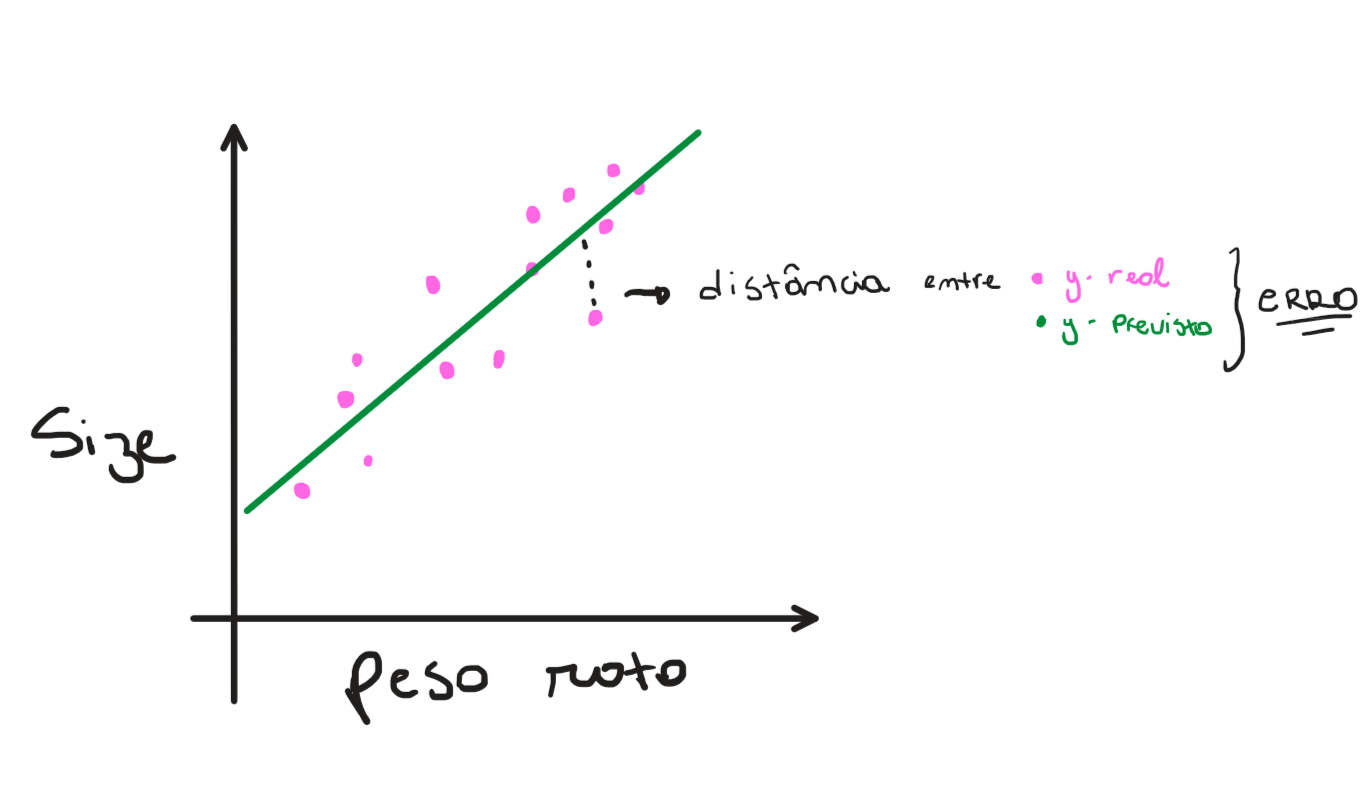

Agora, se elevarmos esse erro ao quadrado, somarmos o erro quadrado de todos os outros dados e dividirmos pelo numero de observações, temos o MSE.

#### Questões para *Fixação*

1) O que a regressão linear tenta encontrar entre duas variáveis?

a) A média dos valores

b) A soma dos erros quadráticos

c) A reta que melhor se ajusta aos dados

2) Se o valor de $R^2$ for muito baixo, o que isso indica sobre o modelo?

a) O modelo explica bem os dados

b) O modelo não consegue explicar bem a variação em Y

c) O modelo tem um erro quadrático nulo

3) Qual técnica usamos para encontrar a melhor reta em uma regressão linear?

a) Método dos mínimos quadrados

b) Força bruta

c) Tentativa e erro

#### Gabarito


1) c

2) b

3) a

### Regressão Logística

#### O que é a Regressão Logística? 🤔


A Regressão Logística é um algoritmo de aprendizado supervisionado utilizado
para problemas de classificação, especialmente quando a variável de saída é
categórica, por exemplo, sim/não, 0/1, verdadeiro/falso. Apesar do nome
"regressão", ela não prevê um valor contínuo, mas sim a probabilidade de
um evento ocorrer.


![Imagem Regressão Logística](https://prwatech.in/blog/wp-content/uploads/2020/02/logi1.png)

Imagine que você está tentando prever se um e-commerce vai vender um produto
para um cliente com base em algumas características dele, como idade, renda e
tempo de navegação no site. A Regressão Logística pode estimar a probabilidade
desse cliente realizar a compra. Se a probabilidade for maior que um
determinado limiar (geralmente 0.5), classificamos como "vai comprar" ;
caso contrário, "não vai comprar".

Como funciona por baixo dos panos:

- Função Sigmoide (ou Logística): O coração da Regressão Logística é a
função sigmoide, que "espreme" qualquer valor real entre 0 e 1.
Isso a torna ideal para transformar as saídas lineares em probabilidades.

- Limiar de Decisão: Após calcular a probabilidade, um limiar (threshold) é
aplicado para converter essa probabilidade em uma classe. Por exemplo, se a
probabilidade de compra for 0.7 e o limiar for 0.5, o cliente é classificado
como "vai comprar".
"regressão", ela não prevê um valor contínuo, mas sim a probabilidade de
um evento ocorrer.

![Imagem Sigmoid](https://brains.dev/wp-content/uploads/2023/01/log_reg8-768x438.png)

#### Mão na massa!

In [ ]:
print("------------------------------------------")
print("Regressão Logística no Dataset de Vinhos")
print("------------------------------------------")

# Inicializando o modelo de Regressão Logística
# O parâmetro 'max_iter' é aumentado para garantir a convergência em alguns datasets
log_reg_model = LogisticRegression(max_iter=3000, random_state=42)

# Treinando o modelo
log_reg_model.fit(X_train, y_train)

# Fazendo previsões nos dados de teste
y_pred_log_reg = log_reg_model.predict(X_test)

# Avaliando o modelo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg))

print("\nF1-Score no conjunto de teste:", f1_score(y_test, y_pred_log_reg, average='macro'))
print("------------------------------------------")

------------------------------------------
Regressão Logística no Dataset de Vinhos
------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54


F1-Score no conjunto de teste: 1.0
------------------------------------------


#### Questões para *Fixação*

##### Questão 1: Qual a principal diferença entre Regressão Linear e Regressão Logística?

a) Regressão Linear é para classificação e Regressão Logística é para previsão de valores contínuos.

b) Regressão Linear usa a função sigmoide e Regressão Logística não.

c) Regressão Linear prevê valores contínuos e Regressão Logística prevê probabilidades para problemas de classificação.

d) Ambas são usadas exclusivamente para prever valores contínuos.

**Digite sua resposta:**

##### Questão 2: A função sigmoide (ou função logística) é crucial na Regressão Logística porque ela:

a) Acelera o treinamento do modelo.

b) Transforma os dados de entrada em uma escala logarítmica.

c) Converte a saída linear do modelo em uma probabilidade entre 0 e 1.

d) Seleciona as características mais importantes para o modelo.

**Digite sua resposta:**

##### Questão 3: Em um problema de classificação binária usando Regressão Logística, se a probabilidade calculada para uma instância é 0.65 e o limiar de decisão padrão é 0.5, qual classe será atribuída a essa instância?

**Digite sua resposta:**

#### Gabarito



---


##### Questão 1:
Alternativa C


---


##### Questão 2:
Alternativa C


---


##### Questão 3:
A instância será classificada como a classe positiva (ou 1), pois a probabilidade calculada (0.65) é maior que o limiar de decisão padrão (0.5).

## Regularização

### O que é regularização?🤔

A regularização é um conjunto de técnicas em Machine Learning usadas para evitar que os modelos se tornem muito complexos e se ajustem excessivamente (overfitting) aos dados de treinamento. Ela ajuda o modelo a generalizar melhor para dados novos e não vistos.


Imagine que você é um estudante se preparando para uma prova.

- Overfitting sem regularização: Se você memorizar cada detalhe do livro, incluíndo exemplos específicos e até erros de digitação, você pode se sair muito bem em questões idênticas às do livro (dados de treinamento). No entanto, se a prova tiver questões com uma pequena variação ou em um formato diferente (dados de teste), você terá dificuldade porque seu conhecimento está muito "ajustado"ao material de estudo exato, e não aos conceitos gerais.

- Com regularização: Agora, imagine que, ao invés de memorizar, você se concentra em entender os conceitos fundamentais e as regras gerais. Você ainda estuda, mas dá menos peso aos detalhes minúsculos e ao ruído. Assim, quando a prova vier com perguntas ligeiramente diferentes, você consegue aplicar o que aprendeu e generaizar seu conhecimento, obtendo um bom desempenho.


A lógica da regularização é essa: ela penaliza a complexidade do modelo, incentivando-o a focar nos padrões mais importantes dos dados, em vez de memorizar o "ruído". Isso resulta em um modelo que não se ajusta excessivamente aos dados de treinamento e tem uma melhor capacidade de generalizar para novos dados.



![Regularização](https://bixtecnologia.com.br/wp-content/uploads/2021/06/vies-e-variancia-3.png)



### Como funciona?


A regularização geralmente adiciona um termo de penalidade à função de custo (ou função de perda) do modelo. A função de custo normal tenta minimizar os erros do modelo nos dados de treinamento. Com a regularização, a função de custo se torna:

- Custo Total = Custo de Erro + Termo de Penalidade

Este termo de penalidade é geralmente proporcional à magnitude dos pesos (coeficientes) do modelo. Ao minimizar o custo total, o algoritmo é forçado a manter os pesos pequenos. Pesos menores significam que o modelo é mais simples e menos propenso a overfitar.

### Tipos de Regularização

#### Existem dois tipos principais de regularização para modelos lineares:

- Regularização L1 (Lasso Regression): Adiciona a soma dos valores absolutos dos pesos como penalidade. Isso tem o efeito de forçar alguns pesos a serem exatamente zero, o que é útil para seleção de características, tornando o modelo mais interpretável, pois ele descarta características menos relevantes.

- Regularização L2 (Ridge Regression): Adiciona a soma dos quadrados dos pesos como penalidade. Isso encolhe os pesos, mas raramente os torna zero. É eficaz para reduzir a complexidade do modelo e lidar com multicolinearidade (quando as características de entrada são altamente correlacionadas).

A regularização é uma técnica essencial para construir modelos de Machine Learning que sejam eficientes e confiáveis na vida real, garantindo que eles aprendam os padrões certos e não apenas memorizem os dados.